In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [29]:
train = pd.read_csv('train_set.csv')
train = train.set_index('Date')
train.index = pd.to_datetime(train.index)
y_train = train['forward_return_3']
X_train = train.drop('forward_return_3', axis = 1)

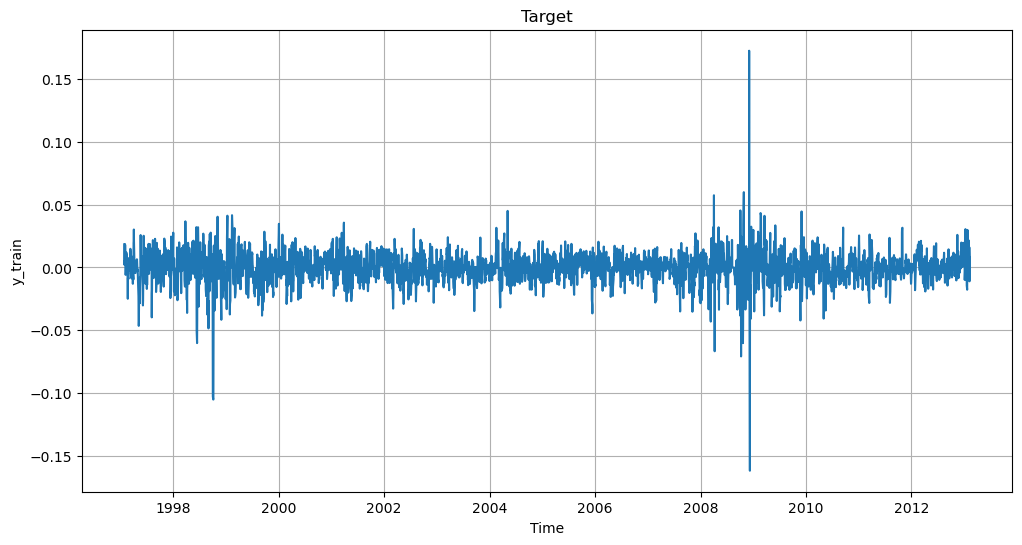

In [37]:
plt.figure(figsize = (12,6))
plt.plot(y_train)
plt.title('Target')
plt.xlabel('Time')
plt.ylabel('y_train')
plt.grid(True)
plt.show()

/Users/ryliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Distribution of target')

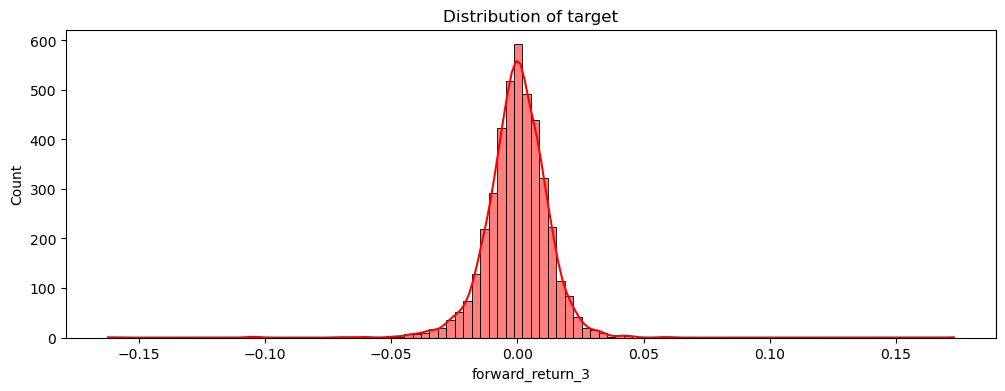

In [35]:
# depict the distribution of target
f, ax = plt.subplots(figsize = (12, 4))
sns.histplot(y_train, bins =100, kde=True, color = 'r', ax =ax)
ax.set_title('Distribution of target')


Obviously, the target(3-day forward return) has no significant trend and season. we go to ACF and PACF directly to look over whether it has trends of seasons.

In [51]:
#stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(y_train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' %(key, value))

ADF Statistic: -11.309360
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


 i for ARIMA = 0

In [38]:
%matplotlib inline
plt.style.use('ggplot')
plt.xkcd() #:)
import statsmodels.api as sm

y_acf = sm.tsa.stattools.acf(y_train, nlags=40)
y_acf

array([ 1.        ,  0.57177526,  0.28504065, -0.07133674, -0.00201815,
       -0.02107375, -0.01316147, -0.01958944,  0.0266258 ,  0.02829948,
        0.04526178,  0.00828641, -0.00659309, -0.02101425, -0.01963542,
       -0.02538901, -0.02582717, -0.02028463,  0.00684476,  0.01643787,
        0.02564404, -0.0022533 , -0.00139114, -0.02808566, -0.00661029,
       -0.00782756,  0.01927679,  0.03112263,  0.03468058,  0.01448181,
       -0.02907132, -0.05247397, -0.03889738, -0.0103336 ,  0.0103541 ,
        0.03958261,  0.02922425,  0.03586414,  0.01488728,  0.04914598,
        0.02687484])

In [46]:
y_pacf = sm.tsa.stattools.pacf(y_train, nlags=40)
y_pacf

array([ 1.        ,  0.57191191, -0.06227562, -0.31183433,  0.30082806,
       -0.0836534 , -0.15871457,  0.18643524,  0.01185411, -0.12727215,
        0.1430804 , -0.03541688, -0.11015188,  0.11626537, -0.03666087,
       -0.09708488,  0.0965114 , -0.01891418, -0.04338033,  0.07546772,
       -0.01010807, -0.08046652,  0.08760058, -0.05220135, -0.0232278 ,
        0.08077093, -0.03167549,  0.00887368,  0.04519346, -0.0634273 ,
       -0.04847033,  0.04641925, -0.0143127 , -0.01685613,  0.04404368,
        0.04454409, -0.07293596,  0.05116153,  0.04121944, -0.00414883,
       -0.02338076])

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

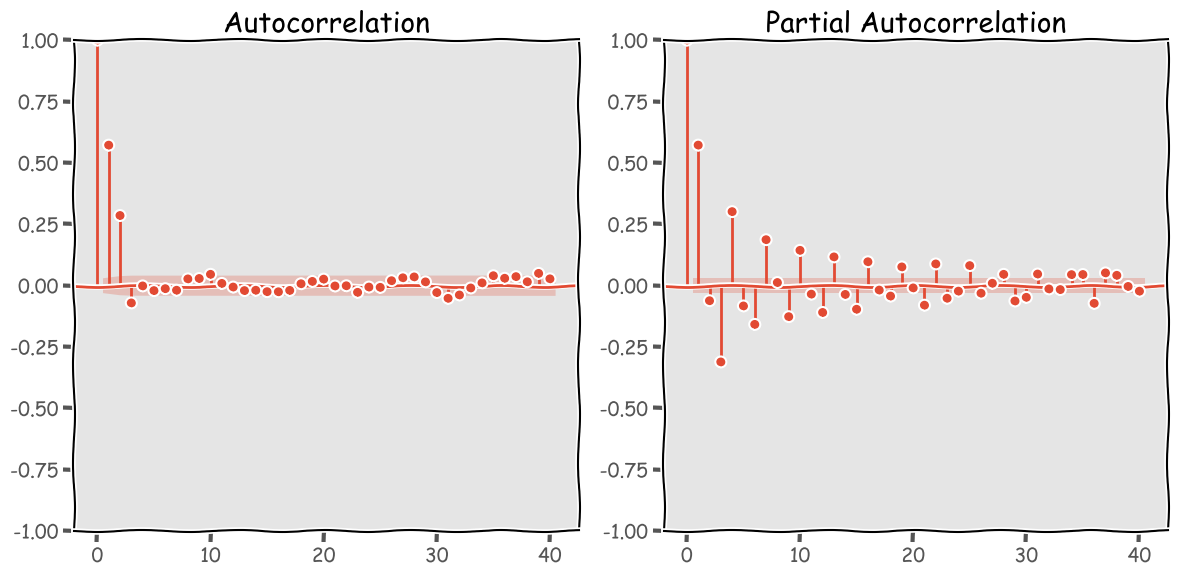

In [50]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sm.graphics.tsa.plot_acf(y_train,lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(y_train, lags=40, ax = ax2)

plt.tight_layout()
plt.show()

ACF tails cut off by 2, while pacf has a gradually decreasing trend.Thus, the graphs suggests that an MA(3) model would be appropriate for the time series.

In [58]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y_train, order = (2,0,0)).fit()
print(model.summary())

/Users/ryliu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/Users/ryliu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/Users/ryliu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



                               SARIMAX Results                                
Dep. Variable:       forward_return_3   No. Observations:                 4185
Model:                 ARIMA(2, 0, 0)   Log Likelihood               13233.474
Date:                Fri, 19 Jan 2024   AIC                         -26458.947
Time:                        23:37:08   BIC                         -26433.590
Sample:                    01-27-1997   HQIC                        -26449.980
                         - 02-08-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.292      0.770      -0.001       0.001
ar.L1          0.6078      0.004    143.690      0.000       0.600       0.616
ar.L2         -0.0625      0.009     -6.965      0.0

In [59]:
import pmdarima as pm 

model = pm.auto_arima(y_train, seasonal=False, stepwise=True, suppress_warnings=True)


In [60]:
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4185
Model:               SARIMAX(2, 0, 2)   Log Likelihood               14058.759
Date:                Fri, 19 Jan 2024   AIC                         -28107.518
Time:                        23:38:59   BIC                         -28075.821
Sample:                    01-27-1997   HQIC                        -28096.308
                         - 02-08-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1879      0.005    -38.346      0.000      -0.198      -0.178
ar.L2         -0.0437      0.011     -3.947      0.000      -0.065      -0.022
ma.L1          0.9765      0.004    247.233      0.0